In [8]:
import os
import random
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy
from Config import apikey

In [ ]:
# Observations:
# 1) Where to use computing power? I wanted to get a long list of cities, which is great using my PC's power to generate a 5000 city list to weed out duplicates, but making API calls for that many cities does take a while to rerun and not very efficient.
# 2) Writing a function for the graphs was fun and felt efficient if I had to do it again (which I'm sure I will). I would spend more time optimizing how to display the chart information when I go back, because it does look a little different based on those ylims set.
# 3) More of the graphs at the bottom show a strong conclusion that there is no correlation, rather than a strong conclusion there is a correlation.
# 4) It was nice to find one observation, Temperature in the Southern Hemisphere had a strong linear correlation with a great deal of confidence.

In [2]:
# Testing Citipy
citipy.nearest_city(22.99, 120.21).city_name

'tainan'

In [3]:
# Get a list of a whole bunch of different cities! 
latitude = []
longitude = []

for x in range(0,5000):
    latitude.append(random.randint(-90, 90))
    longitude.append(random.randint(-180, 180))

print(latitude, longitude)
cities = []

if len(latitude) == len(longitude):
    for x in range(0, len(latitude)):
        city = citipy.nearest_city(round(latitude[x], 6), round(longitude[x], 6))
        print(f"Searching: {round(latitude[x], 6)}, {round(longitude[x], 6)}")
        print(f"Found {city.city_name}!")
        print("----------------")
        cities.append([city.city_name, round(latitude[x], 6), round(longitude[x], 6)])

[-19, 66, 32, -3, 16, 73, -62, 63, -49, -87, 26, -54, 35, -60, 77, 74, -46, 41, -47, 7, -39, -63, -67, 26, -40, -48, 73, 34, 21, 10, 58, 54, 42, -89, -90, -5, -32, 28, -53, -14, 29, 25, 28, 87, 85, -89, 34, 34, 75, 66, -86, -82, 41, 77, 58, 57, 62, 86, -32, 80, -33, 41, 37, -47, 19, -20, 62, 56, 51, 45, 51, -72, -71, 18, 77, 46, -35, -30, 14, -83, 8, -36, 46, 47, -50, 23, 30, 41, -30, 45, 12, -7, -45, -10, 51, 12, 69, 10, 22, 10, 56, 42, -60, 68, 80, -36, 47, 68, -33, 13, 86, 28, 49, -16, -69, -21, -76, 3, -63, -73, 75, 8, -17, 79, 14, 27, -89, -6, -40, -31, -54, -78, -88, -7, -27, 82, -17, 37, 82, 7, -82, 56, -59, -47, 20, -65, -34, 57, -37, 8, -81, 53, -64, -4, 41, -37, 39, 32, -75, 67, 74, -75, 80, -42, 60, -57, 84, 88, 58, -75, -89, -51, 45, -89, -32, -32, 47, 49, -33, 84, 84, 17, 63, 45, 83, -85, 8, -44, -14, 11, 65, -51, -18, -65, -16, -63, 34, -68, -59, -45, 23, 38, -8, 57, 34, 86, -54, 41, 82, -80, 19, 51, 54, -51, 86, 70, 3, -6, -46, -15, 58, -66, -74, -23, 13, -13, 34, -51, -

Searching: -33, -19
Found jamestown!
----------------
Searching: 83, 38
Found tumannyy!
----------------
Searching: -47, -30
Found cidreira!
----------------
Searching: -51, 42
Found east london!
----------------
Searching: -79, -140
Found rikitea!
----------------
Searching: -73, -74
Found ushuaia!
----------------
Searching: 32, -129
Found pacific grove!
----------------
Searching: 30, 120
Found fuyang!
----------------
Searching: 0, -37
Found paracuru!
----------------
Searching: -15, 144
Found mareeba!
----------------
Searching: 74, -2
Found klaksvik!
----------------
Searching: 38, -126
Found ukiah!
----------------
Searching: 57, -70
Found iqaluit!
----------------
Searching: -43, -96
Found castro!
----------------
Searching: 15, -58
Found bathsheba!
----------------
Searching: 57, -61
Found saint-augustin!
----------------
Searching: 87, 24
Found longyearbyen!
----------------
Searching: 41, 68
Found chardara!
----------------
Searching: -51, 166
Found bluff!
----------------
S

Searching: -60, -1
Found cape town!
----------------
Searching: -23, 65
Found bambous virieux!
----------------
Searching: -13, 79
Found hithadhoo!
----------------
Searching: -22, 73
Found grand river south east!
----------------
Searching: 17, -10
Found nioro!
----------------
Searching: -77, -119
Found punta arenas!
----------------
Searching: -42, -91
Found ancud!
----------------
Searching: 26, 54
Found bandar-e lengeh!
----------------
Searching: 15, -172
Found kapaa!
----------------
Searching: 42, 68
Found chardara!
----------------
Searching: 76, 179
Found leningradskiy!
----------------
Searching: 53, 116
Found vershino-darasunskiy!
----------------
Searching: -79, 141
Found hobart!
----------------
Searching: 59, 64
Found tabory!
----------------
Searching: -29, -71
Found vallenar!
----------------
Searching: -16, -127
Found rikitea!
----------------
Searching: 4, 26
Found zemio!
----------------
Searching: -32, 154
Found port macquarie!
----------------
Searching: 45, 24
Fo

Searching: 89, 17
Found longyearbyen!
----------------
Searching: 56, 44
Found dalneye konstantinovo!
----------------
Searching: -20, 124
Found broome!
----------------
Searching: -50, -138
Found rikitea!
----------------
Searching: 50, -19
Found dingle!
----------------
Searching: 33, 78
Found manali!
----------------
Searching: 24, -1
Found taoudenni!
----------------
Searching: 80, 105
Found khatanga!
----------------
Searching: 8, -98
Found pochutla!
----------------
Searching: -26, -117
Found rikitea!
----------------
Searching: -52, 138
Found new norfolk!
----------------
Searching: -33, -3
Found jamestown!
----------------
Searching: -85, 174
Found bluff!
----------------
Searching: -13, -107
Found puerto ayora!
----------------
Searching: -35, 133
Found flinders!
----------------
Searching: 80, -109
Found yellowknife!
----------------
Searching: 68, 124
Found zhigansk!
----------------
Searching: 24, -154
Found kahului!
----------------
Searching: -11, 12
Found sumbe!
--------

Searching: 33, 51
Found faridan!
----------------
Searching: -35, -155
Found mataura!
----------------
Searching: -9, -172
Found saleaula!
----------------
Searching: 90, 7
Found barentsburg!
----------------
Searching: 9, -147
Found hilo!
----------------
Searching: -36, -133
Found rikitea!
----------------
Searching: -40, -140
Found rikitea!
----------------
Searching: -74, -178
Found vaini!
----------------
Searching: 25, -130
Found lompoc!
----------------
Searching: 59, -79
Found attawapiskat!
----------------
Searching: -8, -108
Found puerto ayora!
----------------
Searching: -41, 167
Found wanaka!
----------------
Searching: 42, -48
Found torbay!
----------------
Searching: -61, -35
Found mar del plata!
----------------
Searching: 1, 57
Found victoria!
----------------
Searching: -20, 149
Found bowen!
----------------
Searching: 72, -62
Found upernavik!
----------------
Searching: 57, 137
Found ayan!
----------------
Searching: -74, 99
Found albany!
----------------
Searching: -

Searching: 48, 53
Found makat!
----------------
Searching: 57, 153
Found ola!
----------------
Searching: -88, -23
Found ushuaia!
----------------
Searching: 35, -25
Found vila franca do campo!
----------------
Searching: 8, -17
Found bubaque!
----------------
Searching: 18, -79
Found lucea!
----------------
Searching: -90, 101
Found albany!
----------------
Searching: -70, 134
Found new norfolk!
----------------
Searching: 21, -6
Found taoudenni!
----------------
Searching: -67, -110
Found punta arenas!
----------------
Searching: -69, -12
Found cape town!
----------------
Searching: -61, 51
Found tsihombe!
----------------
Searching: -72, -88
Found punta arenas!
----------------
Searching: -19, -168
Found alofi!
----------------
Searching: -85, -128
Found rikitea!
----------------
Searching: -68, -127
Found rikitea!
----------------
Searching: -80, -26
Found ushuaia!
----------------
Searching: -86, -168
Found vaini!
----------------
Searching: -82, -128
Found rikitea!
--------------

Searching: 15, 165
Found butaritari!
----------------
Searching: 38, -169
Found kapaa!
----------------
Searching: 32, -165
Found kapaa!
----------------
Searching: 16, -117
Found cabo san lucas!
----------------
Searching: 71, -39
Found tasiilaq!
----------------
Searching: -29, 141
Found broken hill!
----------------
Searching: 6, -102
Found tecoanapa!
----------------
Searching: 42, 0
Found barbastro!
----------------
Searching: 11, 36
Found bure!
----------------
Searching: -15, -20
Found georgetown!
----------------
Searching: -29, 125
Found esperance!
----------------
Searching: 78, 18
Found longyearbyen!
----------------
Searching: 78, 148
Found chokurdakh!
----------------
Searching: -70, -150
Found mataura!
----------------
Searching: -30, -51
Found gravatai!
----------------
Searching: -72, 96
Found busselton!
----------------
Searching: 56, -137
Found sitka!
----------------
Searching: -6, -48
Found ananas!
----------------
Searching: 7, 172
Found butaritari!
---------------

Searching: 20, 146
Found katsuura!
----------------
Searching: 49, 82
Found shar!
----------------
Searching: -64, 161
Found bluff!
----------------
Searching: -15, -57
Found barra do bugres!
----------------
Searching: -20, 20
Found grootfontein!
----------------
Searching: -27, 22
Found tsabong!
----------------
Searching: -25, 99
Found carnarvon!
----------------
Searching: 85, 94
Found khatanga!
----------------
Searching: 45, 53
Found shetpe!
----------------
Searching: 9, -103
Found acapulco!
----------------
Searching: 35, 179
Found nikolskoye!
----------------
Searching: -1, 176
Found tabukiniberu!
----------------
Searching: 60, 160
Found palana!
----------------
Searching: -33, -144
Found mataura!
----------------
Searching: -52, 177
Found dunedin!
----------------
Searching: -85, -6
Found hermanus!
----------------
Searching: 17, 123
Found dicabisagan!
----------------
Searching: 19, 14
Found bilma!
----------------
Searching: -67, 73
Found saint-philippe!
----------------
S

Searching: 24, -178
Found kapaa!
----------------
Searching: 47, -124
Found hoquiam!
----------------
Searching: 25, 85
Found tekari!
----------------
Searching: 9, -57
Found georgetown!
----------------
Searching: 55, 111
Found kurumkan!
----------------
Searching: -65, -49
Found ushuaia!
----------------
Searching: 75, 40
Found ostrovnoy!
----------------
Searching: 26, -145
Found hilo!
----------------
Searching: -65, -127
Found rikitea!
----------------
Searching: -30, -154
Found avera!
----------------
Searching: 45, -53
Found bay roberts!
----------------
Searching: -26, 139
Found mount isa!
----------------
Searching: -89, 162
Found bluff!
----------------
Searching: -83, 27
Found bredasdorp!
----------------
Searching: 52, -144
Found sitka!
----------------
Searching: 60, -148
Found palmer!
----------------
Searching: 82, 1
Found barentsburg!
----------------
Searching: 68, -16
Found husavik!
----------------
Searching: 36, -45
Found torbay!
----------------
Searching: 83, 116


Searching: -82, -27
Found ushuaia!
----------------
Searching: -90, 114
Found albany!
----------------
Searching: -88, -148
Found mataura!
----------------
Searching: 77, 130
Found tiksi!
----------------
Searching: 59, 64
Found tabory!
----------------
Searching: -8, -98
Found puerto ayora!
----------------
Searching: 43, -133
Found north bend!
----------------
Searching: 72, 161
Found cherskiy!
----------------
Searching: -71, -11
Found cape town!
----------------
Searching: -12, 76
Found hithadhoo!
----------------
Searching: 28, 114
Found pingxiang!
----------------
Searching: 45, 144
Found mombetsu!
----------------
Searching: -24, 19
Found aranos!
----------------
Searching: 48, -154
Found kodiak!
----------------
Searching: 50, 148
Found vostok!
----------------
Searching: 70, 14
Found stokmarknes!
----------------
Searching: 77, -20
Found illoqqortoormiut!
----------------
Searching: 73, 100
Found khatanga!
----------------
Searching: -51, 136
Found new norfolk!
---------------

Searching: 67, 50
Found ust-tsilma!
----------------
Searching: 82, 16
Found longyearbyen!
----------------
Searching: -73, 67
Found taolanaro!
----------------
Searching: -21, 168
Found tadine!
----------------
Searching: -32, 126
Found esperance!
----------------
Searching: -85, -6
Found hermanus!
----------------
Searching: 26, 42
Found buraydah!
----------------
Searching: -79, 76
Found busselton!
----------------
Searching: -39, -32
Found arraial do cabo!
----------------
Searching: -55, 120
Found albany!
----------------
Searching: 71, 109
Found saskylakh!
----------------
Searching: -52, 19
Found bredasdorp!
----------------
Searching: -33, 124
Found esperance!
----------------
Searching: 14, -64
Found barroualie!
----------------
Searching: -28, -38
Found arraial do cabo!
----------------
Searching: 25, -88
Found panaba!
----------------
Searching: 48, 85
Found zaysan!
----------------
Searching: 15, -113
Found cabo san lucas!
----------------
Searching: 90, -19
Found illoqqort

Searching: 87, 24
Found longyearbyen!
----------------
Searching: 1, 51
Found hobyo!
----------------
Searching: -40, -118
Found rikitea!
----------------
Searching: -5, -7
Found georgetown!
----------------
Searching: 24, -147
Found hilo!
----------------
Searching: -9, -23
Found georgetown!
----------------
Searching: -42, 113
Found albany!
----------------
Searching: 50, 111
Found kyra!
----------------
Searching: -35, -47
Found cidreira!
----------------
Searching: -48, -35
Found chuy!
----------------
Searching: 49, 129
Found poyarkovo!
----------------
Searching: -62, 26
Found kruisfontein!
----------------
Searching: 22, 30
Found aswan!
----------------
Searching: 0, 46
Found mogadishu!
----------------
Searching: 59, 18
Found nynashamn!
----------------
Searching: 51, 68
Found atbasar!
----------------
Searching: 72, -43
Found tasiilaq!
----------------
Searching: -38, 62
Found saint-philippe!
----------------
Searching: -49, 157
Found tuatapere!
----------------
Searching: -59

Searching: -45, -21
Found arraial do cabo!
----------------
Searching: 77, 32
Found vardo!
----------------
Searching: -21, 49
Found nosy varika!
----------------
Searching: 68, -17
Found husavik!
----------------
Searching: -36, 154
Found kiama!
----------------
Searching: 16, -74
Found les cayes!
----------------
Searching: -35, -130
Found rikitea!
----------------
Searching: -9, 22
Found lucapa!
----------------
Searching: -45, 11
Found cape town!
----------------
Searching: -45, -137
Found rikitea!
----------------
Searching: -70, 162
Found bluff!
----------------
Searching: -90, -128
Found rikitea!
----------------
Searching: 38, 117
Found cangzhou!
----------------
Searching: 80, 92
Found talnakh!
----------------
Searching: 30, 18
Found surt!
----------------
Searching: 61, -98
Found thompson!
----------------
Searching: 22, 105
Found tuyen quang!
----------------
Searching: -19, 34
Found chimoio!
----------------
Searching: -7, -61
Found manicore!
----------------
Searching: 65

Found albany!
----------------
Searching: -72, -125
Found rikitea!
----------------
Searching: -33, 3
Found luderitz!
----------------
Searching: 66, -22
Found stykkisholmur!
----------------
Searching: 83, -48
Found upernavik!
----------------
Searching: -70, -88
Found punta arenas!
----------------
Searching: 31, 85
Found pokhara!
----------------
Searching: 35, 76
Found kargil!
----------------
Searching: 21, 14
Found bilma!
----------------
Searching: -12, 14
Found lobito!
----------------
Searching: -70, 81
Found busselton!
----------------
Searching: 50, -127
Found port hardy!
----------------
Searching: -82, -120
Found punta arenas!
----------------
Searching: -9, 106
Found palabuhanratu!
----------------
Searching: 66, 95
Found baykit!
----------------
Searching: -67, 73
Found saint-philippe!
----------------
Searching: -88, -180
Found vaini!
----------------
Searching: -77, 106
Found albany!
----------------
Searching: 40, 97
Found yumen!
----------------
Searching: -13, -77
F

Searching: 24, 167
Found butaritari!
----------------
Searching: -88, -155
Found mataura!
----------------
Searching: -56, -151
Found mataura!
----------------
Searching: -78, -148
Found mataura!
----------------
Searching: -17, -59
Found san matias!
----------------
Searching: 44, -107
Found sheridan!
----------------
Searching: 16, 170
Found butaritari!
----------------
Searching: -21, 167
Found we!
----------------
Searching: -29, 7
Found luderitz!
----------------
Searching: -19, 117
Found karratha!
----------------
Searching: -44, 100
Found busselton!
----------------
Searching: -4, 110
Found manggar!
----------------
Searching: -51, -11
Found cape town!
----------------
Searching: 8, 30
Found ler!
----------------
Searching: -42, 88
Found busselton!
----------------
Searching: -33, -81
Found lebu!
----------------
Searching: 0, 99
Found payakumbuh!
----------------
Searching: 16, 83
Found yanam!
----------------
Searching: 31, 178
Found nikolskoye!
----------------
Searching: -9,

Searching: -40, -41
Found cidreira!
----------------
Searching: 75, 74
Found dikson!
----------------
Searching: 71, 165
Found bilibino!
----------------
Searching: -8, 103
Found labuhan!
----------------
Searching: -31, -3
Found jamestown!
----------------
Searching: -7, 119
Found bima!
----------------
Searching: -53, -73
Found punta arenas!
----------------
Searching: 56, -7
Found bowmore!
----------------
Searching: -75, -17
Found cape town!
----------------
Searching: 9, 173
Found butaritari!
----------------
Searching: 30, 0
Found adrar!
----------------
Searching: 28, -83
Found clearwater!
----------------
Searching: 14, -164
Found kapaa!
----------------
Searching: -39, -118
Found rikitea!
----------------
Searching: -12, 81
Found hithadhoo!
----------------
Searching: -66, 118
Found albany!
----------------
Searching: -85, 36
Found port elizabeth!
----------------
Searching: -66, -159
Found mataura!
----------------
Searching: -27, -55
Found natalio!
----------------
Searching

In [4]:
df = pd.DataFrame(cities)
df = df.drop_duplicates(subset=0, keep=False)
df[0].value_counts()
# Table Manipulation
df = df.rename(columns={0:'City Name', 1:"Latitude", 2:"Longitude"})
df = df.reset_index()
df = df.drop(columns=['index'])
test_df = df.head(5).copy()
len(df)

988

In [5]:
## API Start!
df['Temperature'] = 0.0
df['Humidity'] = 0.0
df['Cloudiness'] = 0.0
df['Wind Speed'] = 0.0
df['City ID'] = np.nan
df['DateTime'] = 0
df['Country'] = ''

In [7]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

# Build the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
lat = ''
lon = ''
query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"


for i, row in df.iterrows():
    c = row['City Name']
    lat = row['Latitude']
    lon = row['Longitude']
    query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"
    response = requests.get(query_url + f"&appid={apikey}").json()
    try:
        df.at[i, 'Humidity'] = response['main']['humidity']
        df.at[i, 'Temperature'] = response['main']['temp']
        df.at[i, 'Cloudiness'] = response['clouds']['all']
        df.at[i, 'Wind Speed'] = response['wind']['speed']
        df.at[i, 'DateTime'] = response['dt']
        df.at[i, 'Country'] = response['sys']['country']
        if response['id'] > 0:
            df.at[i, 'City ID'] = response['id']
            print(f"City:{response['name']} w/ City ID:{response['id']} found!")
        else:
            print(f"{c} not found")
    except KeyError:
        print(f"**** Data was not found, check this row ****")
        
print("Api calls are completed!")

City:Tiros w/ City ID:3446406 found!
City:Midland w/ City ID:5526337 found!
City:Medvezh'yegorsk w/ City ID:527888 found!
**** Data was not found, check this row ****
**** Data was not found, check this row ****
City:Forserum w/ City ID:2713974 found!
City:Akkeshi w/ City ID:2130677 found!
City:Russas w/ City ID:3390160 found!
City:Pozo del Molle w/ City ID:3840470 found!
**** Data was not found, check this row ****
City:Ingrāj Bāzār w/ City ID:1269723 found!
City:As Saffānīyah w/ City ID:108142 found!
City:Malibu w/ City ID:5369906 found!
City:Qasq w/ City ID:2035416 found!
City:Petrovskoye w/ City ID:509850 found!
City:Kalas w/ City ID:1268460 found!
City:Heniches’ka Hirka w/ City ID:708877 found!
City:Mountain w/ City ID:3674272 found!
City:Saryshaghan w/ City ID:1519563 found!
City:Tieli w/ City ID:2034440 found!
City:Lacanau w/ City ID:3010626 found!
City:Bamboo w/ City ID:3580449 found!
City:Cagayancillo w/ City ID:1721082 found!
City:Aldea de San Nicolás, La w/ City ID:6360190 f

City:Cabudare w/ City ID:3647637 found!
City:Shizuishan w/ City ID:1794806 found!
City:Balaka w/ City ID:931865 found!
City:Phelps w/ City ID:5131073 found!
**** Data was not found, check this row ****
City:Assam w/ City ID:1278253 found!
City:Astrakhanskaya Oblast’ w/ City ID:580491 found!
**** Data was not found, check this row ****
City:Mayo Road w/ City ID:6955561 found!
City:Xiaotian w/ City ID:1789963 found!
City:Flinders w/ City ID:7839668 found!
City:Luíee w/ City ID:1043298 found!
City:Abū Qurqāş w/ City ID:362277 found!
City:Jérémie w/ City ID:3723593 found!
City:Mogzon w/ City ID:2019884 found!
**** Data was not found, check this row ****
City:Tegul'det w/ City ID:1489822 found!
City:Eritrea w/ City ID:338010 found!
City:Buciumi w/ City ID:683559 found!
**** Data was not found, check this row ****
City:Sofo-Birnin-Gwari w/ City ID:2347061 found!
City:Lis’i Yamki w/ City ID:6607350 found!
City:Jammu and Kashmir w/ City ID:1269320 found!
**** Data was not found, check this row

**** Data was not found, check this row ****
City:Laluenga w/ City ID:6358360 found!
City:Bīnshangul Gumuz w/ City ID:444181 found!
City:Gravataí w/ City ID:3462089 found!
City:Bom Jesus w/ City ID:3405318 found!
City:Shināş w/ City ID:286402 found!
City:Huejuquilla el Alto w/ City ID:4004616 found!
City:Nizhniy Kuranakh w/ City ID:2019135 found!
City:La Cruz de Río Grande w/ City ID:3618618 found!
City:Alagoas w/ City ID:3472775 found!
City:Karnālī Zone w/ City ID:1283245 found!
City:Bankaw w/ City ID:1727148 found!
City:Matagami w/ City ID:6067747 found!
City:Byerazino w/ City ID:630197 found!
City:Mhamid w/ City ID:2565267 found!
City:Arantāngi w/ City ID:1278448 found!
City:Santo Tomé w/ City ID:6358528 found!
City:Lewiston w/ City ID:5777244 found!
City:Fortaleza do Tabocão w/ City ID:3411892 found!
City:Eyl w/ City ID:60019 found!
City:Doka w/ City ID:376332 found!
City:Siguiri w/ City ID:2415703 found!
City:Alberta w/ City ID:5883102 found!
City:Bacalar w/ City ID:3532465 found!

City:Rudnik w/ City ID:1544819 found!
**** Data was not found, check this row ****
City:Taksimo w/ City ID:2015701 found!
**** Data was not found, check this row ****
City:Stanley w/ City ID:3426691 found!
City:Mudiyah w/ City ID:72557 found!
City:Sānchor w/ City ID:1257477 found!
City:Pawāyan w/ City ID:1260003 found!
City:Lubny w/ City ID:702723 found!
City:Dno w/ City ID:565885 found!
City:Garachiné w/ City ID:3709361 found!
City:Karkatayevy w/ City ID:1504368 found!
City:Skjærhalden w/ City ID:3138976 found!
City:Ossora w/ City ID:2122389 found!
City:Naryn w/ City ID:1527592 found!
City:Bares w/ City ID:3128698 found!
City:Tselinnoye w/ City ID:1489138 found!
**** Data was not found, check this row ****
City:Mbandaka w/ City ID:2312895 found!
City:Ciudad Tula w/ City ID:3515068 found!
City:Aktau w/ City ID:1526601 found!
**** Data was not found, check this row ****
City:Rusta w/ City ID:3140881 found!
City:Concepción w/ City ID:3919352 found!
City:Synes w/ City ID:3134955 found!
Ci

City:Nkan w/ City ID:2224162 found!
City:Miceti w/ City ID:1037807 found!
City:Ely w/ City ID:5025627 found!
City:Avellaneda w/ City ID:3436230 found!
City:Monchegorsk w/ City ID:525404 found!
City:J. M. Péres w/ City ID:3459872 found!
City:Avize w/ City ID:3035661 found!
City:Viñales w/ City ID:3534094 found!
**** Data was not found, check this row ****
City:Tocache w/ City ID:3691324 found!
City:Entre Ríos Province w/ City ID:3434137 found!
City:Chuya w/ City ID:2025230 found!
City:Tabuk w/ City ID:101628 found!
City:Rognan w/ City ID:3141548 found!
City:Mafraq Governorate w/ City ID:250583 found!
City:Āzādshahr w/ City ID:110831 found!
City:Vychegodskiy w/ City ID:470530 found!
**** Data was not found, check this row ****
City:Svetlaya w/ City ID:2015852 found!
City:Quinebaug w/ City ID:4841217 found!
**** Data was not found, check this row ****
**** Data was not found, check this row ****
City:Balcones w/ City ID:3998086 found!
City:Xiage w/ City ID:1917891 found!
City:Castelluccio

City:Yazd w/ City ID:111821 found!
City:Segendy w/ City ID:608398 found!
City:Siddipet w/ City ID:1256377 found!
City:Kwolla w/ City ID:2332662 found!
City:Aldeia Chivungo w/ City ID:1085582 found!
**** Data was not found, check this row ****
Api calls are completed!


In [9]:
df['City ID'].value_counts()

2026023.0    2
362277.0     2
3457419.0    2
1045110.0    2
640440.0     1
            ..
542942.0     1
7302876.0    1
211384.0     1
3388145.0    1
3647637.0    1
Name: City ID, Length: 804, dtype: int64

In [10]:
df.drop_duplicates(subset=['City ID'], keep='first', inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df['City ID'] = df['City ID'].astype(int)
df

City Name  Latitude  Longitude  Temperature  Humidity  Cloudiness  \
0       sao gotardo       -19        -46        66.52      48.0         0.0   
1           midland        32       -102        74.97      64.0         1.0   
2    medvezhyegorsk        63         34        60.37      46.0       100.0   
5         vastervik        58         17        67.35      65.0        10.0   
6           kushiro        42        145        65.91      93.0        43.0   
..              ...       ...        ...          ...       ...         ...   
982            bafq        32         56        98.60       8.0         0.0   
983           aktau        44         51        80.22      69.0        20.0   
984        siddipet        18         79        80.58      75.0       100.0   
985           lafia         9          9        74.01      84.0        98.0   
986    mount darwin       -16         32        73.06      39.0        95.0   

     Wind Speed  City ID    DateTime Country  
0          9.82  3446406  1627132728      BR  
1          5.99  5526337  1627132728      US  
2          8.10   527888  1627132728      RU  
5         12.75  2713974  1627132729      SE  
6          7.96  2130677  1627132729      JP  
..          ...      ...         ...     ...  
982       18.32   111821  1627132985      IR  
983       20.13   608398  1627132986      KZ  
984        9.08  1256377  1627132986      IN  
985        6.80  2332662  1627132986      NG  
986       12.10  1085582  1627132986      MZ  

[804 rows x 10 columns]

In [11]:
df.to_csv("../exported_city_data.csv")

north_df = df.loc[df['Latitude'] >= 0]
south_df = df.loc[df['Latitude'] < 0]

In [38]:
# Make a thing that can scatterplot on repeat
graph_list = ['Temperature', "Humidity", 'Cloudiness', 'Wind Speed']

def scatterPlotIt(col, name, df, hem_name):
    x = df
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.iloc[:,1], x.iloc[:,col])
    regress_values = x.iloc[:,1] * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    cc = st.pearsonr(x.iloc[:,col], x.iloc[:,1])
    plt.scatter(x.iloc[:,1], x.iloc[:,col], facecolors="red", edgecolors="black", alpha=.8)
    plt.grid()
    plt.xlabel(f"Latitude")
    plt.ylabel(f"{name}")
    if hem_name == 0:
        plt.title(f"{name} vs Latitude in The Northern Hemisphere")
        plt.savefig(f"{name} vs Latitude in The Northern Hemisphere")
    elif hem_name == 1:
        plt.title(f"{name} vs Latitude in The Southern Hemisphere")
        plt.savefig(f"{name} vs Latitude in The Southern Hemisphere")
    else:
        plt.title(f"{name} vs Latitude in the World")
        plt.savefig(f"{name} vs Latitude in the World")

#     Draw the Line
    plt.plot(x.iloc[:,1], regress_values)

#     Setting the Min and Max limitations to dynamically put the annotations
    ymin = x.iloc[:,col].min()
    xmin = x.iloc[:,1].min()
    ymax = x.iloc[:,col].max()
    xmax = x.iloc[:,1].max()
    plt.ylim(ymin - (ymin * .1), (ymax + ymax * .05))
    plt.annotate(line_eq, (xmax ,ymax - 3))
    plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (xmax, ymax - 10))
    plt.show()




In [13]:
# Graphs of the World

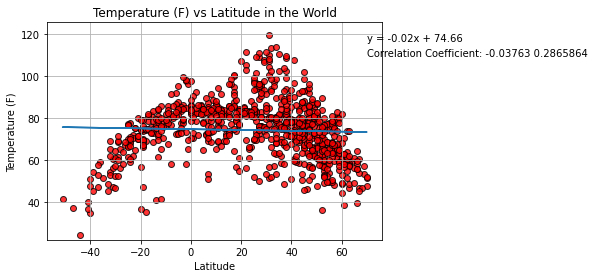

In [40]:
scatterPlotIt(3, "Temperature (F)", df, 99)

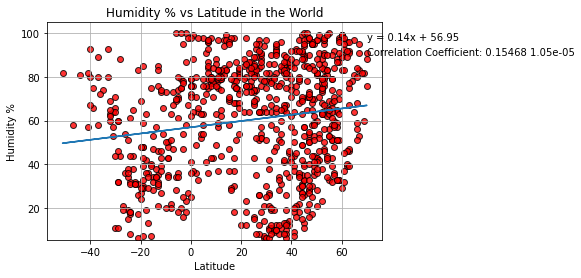

In [41]:
scatterPlotIt(4, "Humidity %", df, 99)

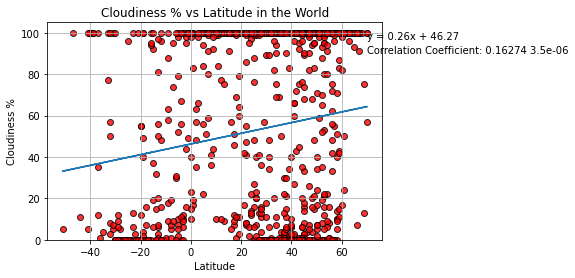

In [42]:
scatterPlotIt(5, "Cloudiness %", df, 99)

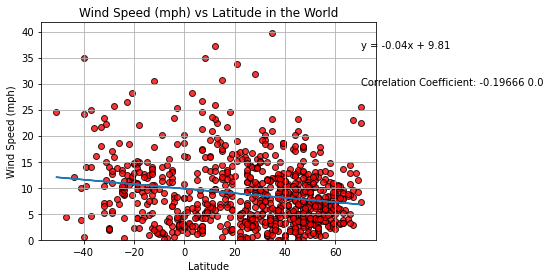

In [43]:
scatterPlotIt(6, "Wind Speed (mph)", df, 99)

In [32]:
# Graphs by Hemisphere

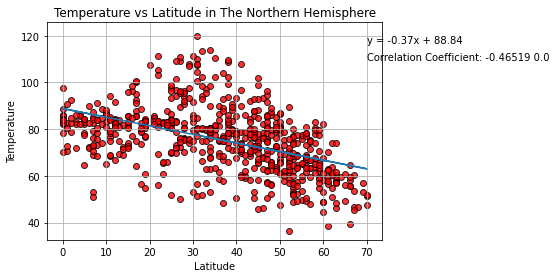

In [44]:
scatterPlotIt(3, graph_list[0], north_df, 0)

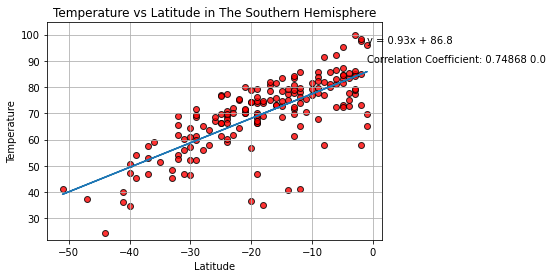

In [45]:
scatterPlotIt(3, graph_list[0], south_df, 1)

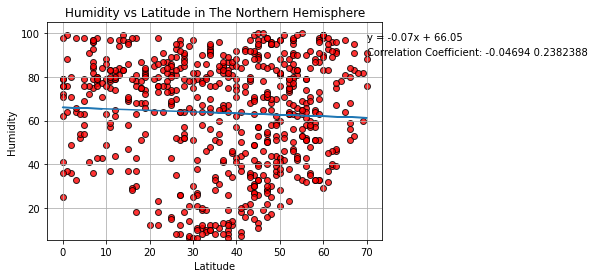

In [46]:
scatterPlotIt(4, graph_list[1], north_df, 0)

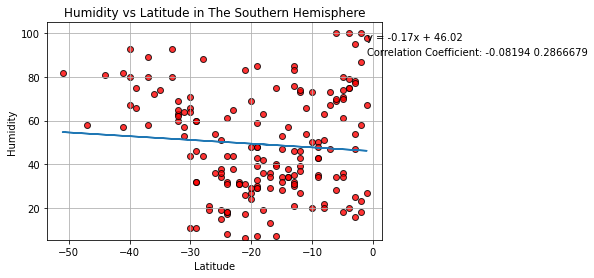

In [47]:
scatterPlotIt(4, graph_list[1], south_df, 1)

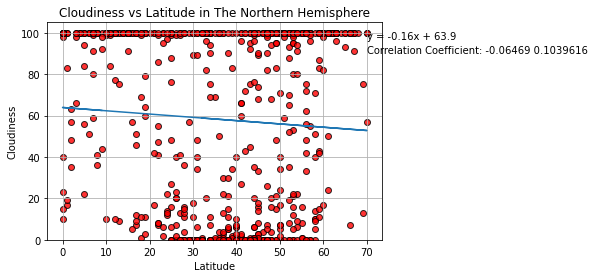

In [48]:
scatterPlotIt(5, graph_list[2], north_df, 0)

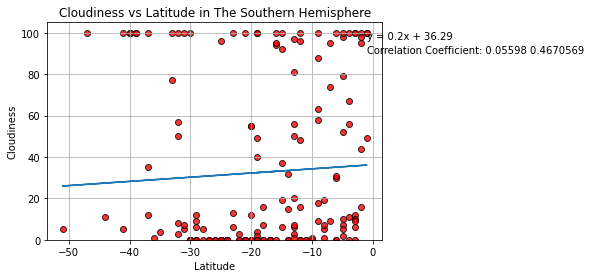

In [49]:
scatterPlotIt(5, graph_list[2], south_df, 1)

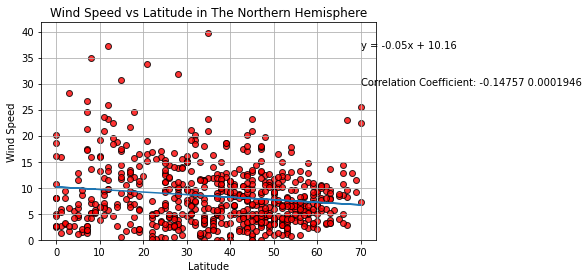

In [50]:
scatterPlotIt(6, graph_list[3], north_df, 0)

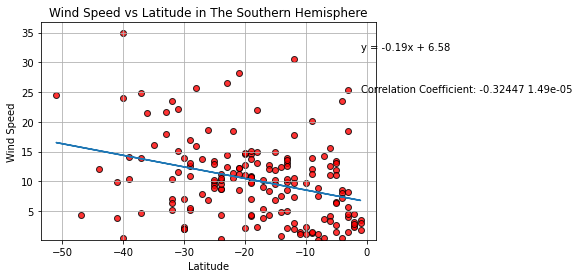

In [51]:
scatterPlotIt(6, graph_list[3], south_df, 1)